This notebook generates all of the figures used in Sam's DRC2017 HyperFET abstract.


In [1]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font',size=18)
import numpy as np
import warnings


from hyperfet.devices import SCMOSFET,VO2,HyperFET
from hyperfet.references import si, shukla_vo2_params

# FET
This is the FET we'll use for all subsequent figures

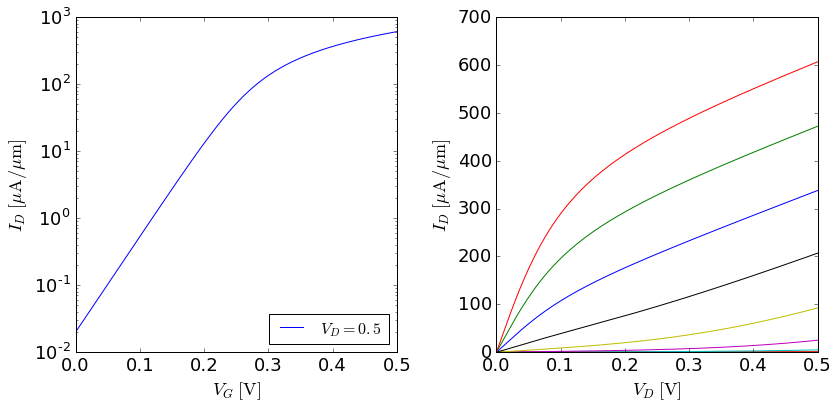

In [2]:
fet=None
@interact(VT0=FloatSlider(value=.35,min=0,max=1,step=.05,continuous_update=False),
          W=FloatSlider(value=70,min=10,max=100,step=10,continuous_update=False),
          Cinv_vxo=FloatSlider(value=2500,min=1000,max=5000,step=400,continuous_update=False),
          SS=FloatSlider(value=.070,min=.05,max=.09,step=.005,continuous_update=False),
          alpha=FloatSlider(value=0,min=0,max=5,step=.5,continuous_update=False),
          beta=FloatSlider(value=1.8,min=0,max=4,step=.1,continuous_update=False),
          VDD=FloatSlider(value=.5,min=.3,max=1,step=.05,continuous_update=False),
          VDsats=FloatSlider(value=.1,min=.1,max=2,step=.1,continuous_update=False),
          delta=FloatSlider(value=.2,min=0,max=.5,step=.1,continuous_update=False),
          log10Gleak=FloatSlider(value=-12,min=-14,max=-5,step=1,continuous_update=False)
         )
def show_HEMT(VT0,W,Cinv_vxo,SS,alpha,beta,VDsats,VDD,delta,log10Gleak):
    global fet
    plt.figure(figsize=(12,6))
    fet=SCMOSFET(
        W=W*1e-9,Cinv_vxo=Cinv_vxo,
        VT0=VT0,alpha=alpha,SS=SS,delta=delta,
        VDsats=VDsats,beta=beta,Gleak=10**log10Gleak)
    
    plt.subplot(121)
    VD=np.array(VDD)
    VG=np.linspace(0,.5,500)
    I=fet.ID(VD=VD,VG=VG)
    plt.plot(VG,I/fet.W,label=r"$V_D={:.2g}$".format(VDD))
    plt.yscale('log')
    plt.xlabel(r"$V_G\;\mathrm{[V]}$")
    plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
    plt.legend(loc='lower right',fontsize=16)
    
    plt.subplot(122)
    VD=np.linspace(0,VDD,500)
    VG=np.linspace(0,VDD,10)
    I=fet.ID(VD=VD,VG=VG)
    plt.plot(VD,I.T/fet.W)
    plt.xlabel(r"$V_D\;\mathrm{[V]}$")
    plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
    #plt.legend([r"$V_G={:.2g}$".format(vg) for vg in VG],loc='lower right',fontsize=16)
    
    plt.tight_layout()

# HyperFET I-V

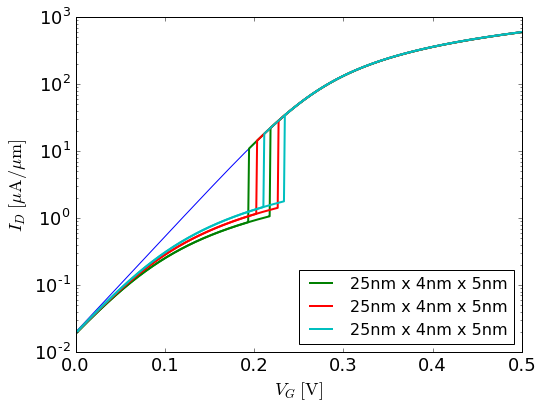

In [6]:
VDD=.5

VD=np.array(VDD)
VG=np.linspace(0,.5,500)

plt.figure(figsize=(8,6))
plt.plot(VG,fet.ID(VD,VG)/fet.W)

for LWT in ["4nm x 15nm x 5nm", "4nm x 20nm x 5nm", "4nm x 25nm x 5nm"]:
    L,W,T=[si(x) for x in LWT.split("x")]
    vo2=VO2(L=L,W=W,T=T,**shukla_vo2_params)
    hf=HyperFET(fet,vo2)
    
    If,Ib=[np.ravel(i) for i in hf.I_double(VD=VD,VG=VG)]
    l=plt.plot(VG[~np.isnan(If)],If[~np.isnan(If)]/fet.W,label=WLT,linewidth=2)[0]
    plt.plot(VG[~np.isnan(Ib)],Ib[~np.isnan(Ib)]/fet.W,linewidth=2,color=l.get_color())
    
plt.yscale('log')
plt.xlabel(r"$V_G\;\mathrm{[V]}$")
plt.ylabel(r"$I_D\;\mathrm{[\mu A/\mu m]}$")
plt.legend(loc='lower right',fontsize=16)

These parameters are given without explanation

In [26]:
raise Exception("Don't run this cell for now")

# Shukla given parameters

# Text
rho_m=si("5e-4 ohm cm")
rho_i=si("80 ohm cm")
J_MIT=si("2e6 A/cm^2")
J_IMT=si(".55e4 A/cm^2")

# Text
thickness=si("14nm")
vo2W=si("14nm")
vo2L=si("8nm")

Exception: Don't run this cell for now